<a href="https://colab.research.google.com/github/arzss-code/Perpustakaan/blob/main/Tensorflow_dan_Keras_TI2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Atsiila Arya Nabiih - 4.33.23.1.04 - TI-2B

Dengan menggunakan pengetahuan yang Anda dapatkan pada sesi kali ini, pergunakan teknik **Hyperparameter Tuning** dan **callbacks** untuk mendapatkan hasil yang lebih baik daripada pada sesi seblumnya:
1. Kasus Regresi: https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking
2. Kasus Klasifikasi: https://www.kaggle.com/datasets/deepu1109/star-dataset

# Regresi - Concrete Strength Prediction

Setup Environment

In [ ]:
# Python ≥3.5 required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import pandas as pd

# Seed untuk reproduktibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Konfigurasi plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Path penyimpanan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "concrete"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Load Dataset

In [ ]:
try:
    concrete = pd.read_csv("concrete_data.csv")
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan 'concrete_data.csv' ada di direktori yang benar!")

# Tampilkan 5 baris pertama
print("\nData samples:")
display(concrete.head())


Data samples:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features dan target
X = concrete.drop("Strength", axis=1)
y = concrete["Strength"]

# Split data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print("\nData shapes:")
print("Train:", X_train.shape)
print("Validation:", X_valid.shape)
print("Test:", X_test.shape)


Data shapes:
Train: (618, 8)
Validation: (206, 8)
Test: (206, 8)


Build Model

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [ ]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

# Simpan model setelah training
model.save("concrete_strength_model.h5")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1487.9838 - val_loss: 1019.6062
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 836.5645 - val_loss: 257.2336
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 227.6067 - val_loss: 163.4773
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 154.5317 - val_loss: 148.0466
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 138.4452 - val_loss: 137.7974
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 128.6448 - val_loss: 131.8854
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 123.3643 - val_loss: 128.1864
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 120.2942 - val_loss: 125.5819
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 118.1908 - val_loss: 123.5072
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 116.4416 - val_loss: 121.7363
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 115.0024 - val_loss: 120.3361
Epoch 12/50
20/20 ━━━━━━━━━

Evaluation

Saving figure concrete_learning_curves


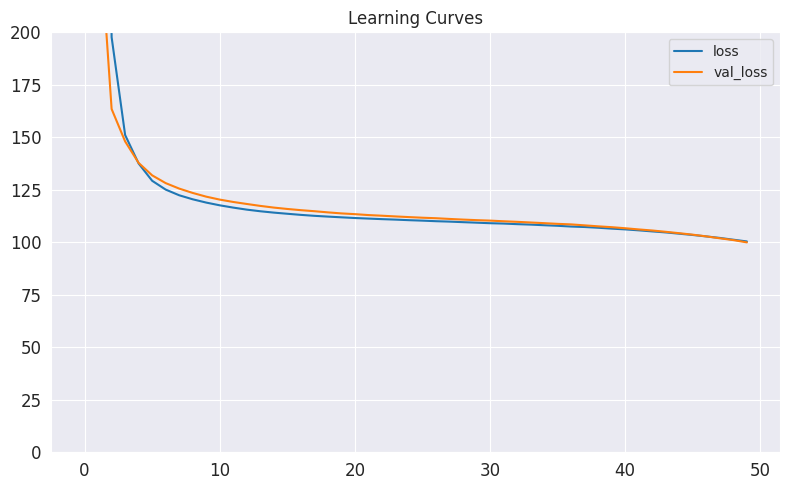

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.5522  

Test MSE: 92.1937
Test RMSE: 9.6018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Sample Predictions:
True		Predicted
52.91		58.50
55.90		51.83
74.50		66.19


In [ ]:
import pandas as pd

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 200)  # Sesuaikan berdasarkan range loss
plt.title("Learning Curves")
save_fig("concrete_learning_curves")
plt.show()

# Evaluasi pada test set
mse_test = model.evaluate(X_test, y_test)
print(f"\nTest MSE: {mse_test:.4f}")
print(f"Test RMSE: {np.sqrt(mse_test):.4f}")

# Prediksi contoh
X_new = X_test[:3]
y_pred = model.predict(X_new)
print("\nSample Predictions:")
print("True\t\tPredicted")
for true, pred in zip(y_test.iloc[:3], y_pred.flatten()):
    print(f"{true:.2f}\t\t{pred:.2f}")

Visualization

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Saving figure concrete_strength_comparison


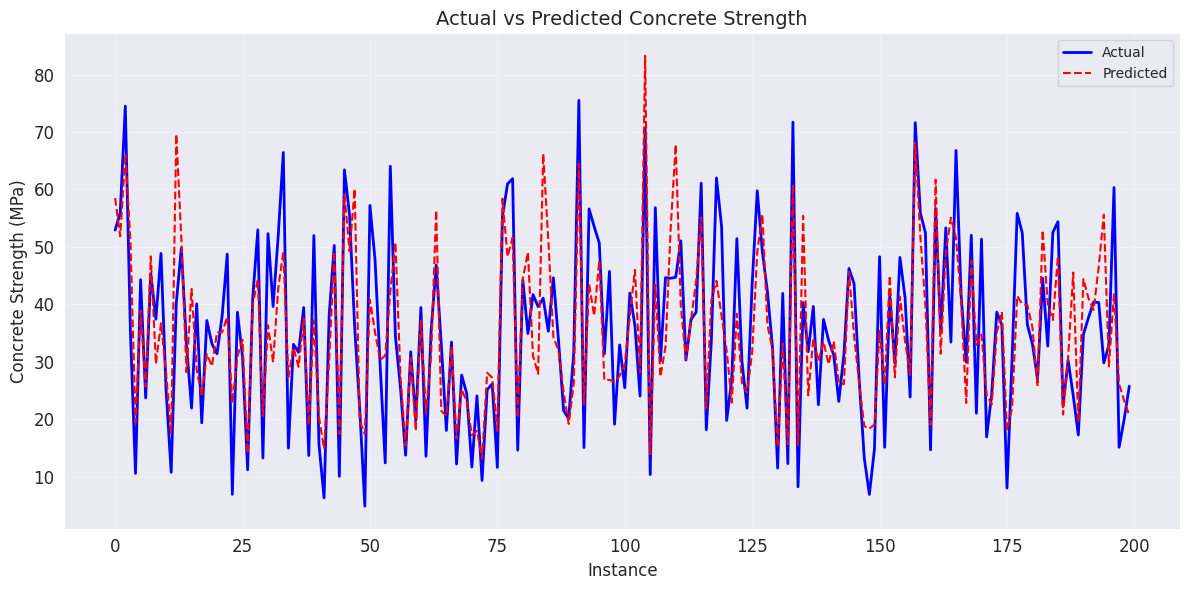

In [ ]:
plt.figure(figsize=(12,6))

# Plot 200 sampel pertama
plt.plot(y_test.values[:200], "b-", linewidth=2, label="Actual")
plt.plot(model.predict(X_test[:200]).flatten(), "r--", linewidth=1.5, label="Predicted")
plt.xlabel("Instance", fontsize=12)
plt.ylabel("Concrete Strength (MPa)", fontsize=12)
plt.title("Actual vs Predicted Concrete Strength", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
save_fig("concrete_strength_comparison")
plt.show()

# Klasifikasi - Star Type Classification


Setup Environment

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Seed setup
np.random.seed(42)
tf.random.set_seed(42)

# Plot config
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "stars"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Load Data

In [ ]:
try:
    stars = pd.read_csv("6_class.csv")
except FileNotFoundError:
    print("Error: File 6_class.csv tidak ditemukan!")

print("\nData samples:")
display(stars.head())


Data samples:


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Clean and map star colors
color_mapping = {
    'red': 'red',
    'blue white': 'blue_white',
    'white': 'white',
    'yellowish white': 'yellow_white',
    'yellowish': 'yellow',
    'orange red': 'orange_red'
}
stars['Star color'] = stars['Star color'].str.lower().str.replace('-', ' ').str.strip().map(color_mapping).fillna('other')

# One-hot encoding
stars_encoded = pd.get_dummies(stars, columns=['Star color', 'Spectral Class'])

# Split features and target
X = stars_encoded.drop('Star type', axis=1)
y = stars_encoded['Star type']

# Split data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("\nData shapes:")
print("Train:", X_train.shape)
print("Validation:", X_valid.shape)
print("Test:", X_test.shape)


Data shapes:
Train: (144, 18)
Validation: (48, 18)
Test: (48, 18)


Build Model

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=[X_train.shape[1]]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,750 (14.65 KB)

 Trainable params: 3,622 (14.15 KB)

 Non-trainable params: 128 (512.00 B)

Training

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.1463 - loss: 2.1315 - val_accuracy: 0.2292 - val_loss: 1.7217
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4038 - loss: 1.7006 - val_accuracy: 0.4792 - val_loss: 1.6374
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5725 - loss: 1.3981 - val_accuracy: 0.4583 - val_loss: 1.5617
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5318 - loss: 1.2266 - val_accuracy: 0.3750 - val_loss: 1.4941
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6055 - loss: 1.1335 - val_accuracy: 0.4792 - val_loss: 1.4358
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7321 - loss: 0.9051 - val_accuracy: 0.5000 - val_loss: 1.3857
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6727 - loss: 0.8400 - val_accuracy: 0.6458 - val_loss: 1.3429
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7080 - loss: 0.8136 - val_accuracy: 0.6667 - val_loss:

Evaluation

Saving figure stars_learning_curves


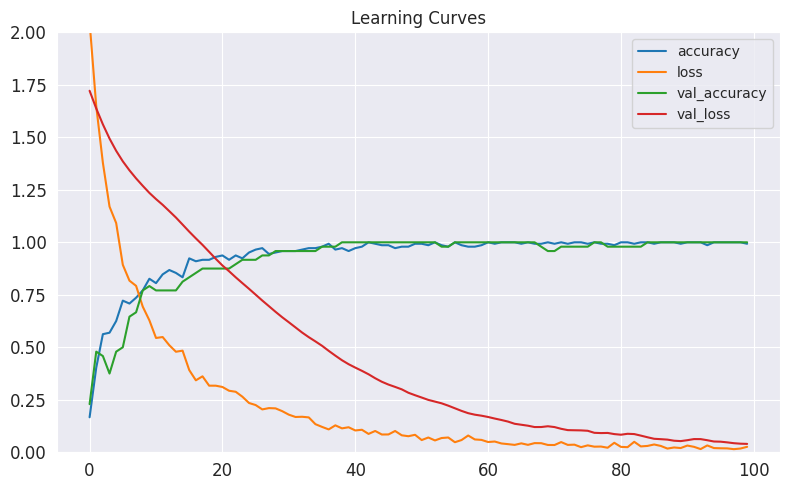

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0250

Test Accuracy: 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [ ]:
# Plot training history
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("Learning Curves")
save_fig("stars_learning_curves")
plt.show()

# Evaluate on test set
test_acc = model.evaluate(X_test, y_test)[1]
print(f"\nTest Accuracy: {test_acc:.4f}")

# Classification report
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Visualization

Saving figure stars_confusion_matrix


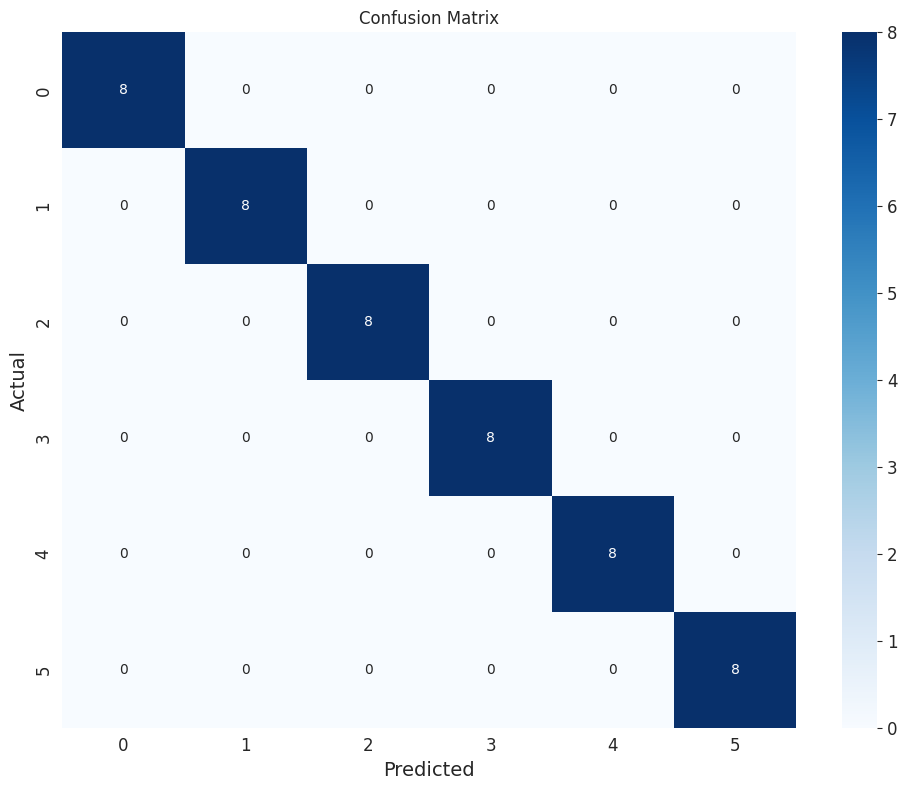


Sample Predictions (5 instances):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Instance 1:
True Class: 1 | Predicted: 1
Class probabilities: [0.099 0.896 0.001 0.002 0.002 0.   ]

Instance 2:
True Class: 3 | Predicted: 3
Class probabilities: [0.    0.    0.    0.999 0.    0.001]

Instance 3:
True Class: 1 | Predicted: 1
Class probabilities: [0.005 0.992 0.    0.001 0.001 0.   ]

Instance 4:
True Class: 0 | Predicted: 0
Class probabilities: [0.998 0.002 0.    0.    0.    0.   ]

Instance 5:
True Class: 4 | Predicted: 4
Class probabilities: [0.    0.    0.    0.    0.999 0.001]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
save_fig("stars_confusion_matrix")
plt.show()

# Sample predictions
print("\nSample Predictions (5 instances):")
sample_data = X_test.iloc[:5]
probabilities = model.predict(sample_data)
predicted_classes = np.argmax(probabilities, axis=1)

for i, (true, pred, prob) in enumerate(zip(y_test.iloc[:5], predicted_classes, probabilities)):
    print(f"\nInstance {i+1}:")
    print(f"True Class: {true} | Predicted: {pred}")
    print(f"Class probabilities: {np.round(prob, 3)}")